### Importing necessary Libraries

In [ ]:
# Install necessary packages and import libraries
# The first few lines ensure that TensorFlow, Scipy, and Matplotlib are installed.
pip install tensorflow
pip install scipy
pip install matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Inline plotting with Matplotlib

In [15]:
%matplotlib inline
# this  command ensures that plots are displayed directly in the notebook after being generated.

In [16]:
# Building a Convolutional Neural Network (CNN) model for terrain classification
# Importing layers from Keras for building the model architecture
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau


### Defining the CNN model
The following code defines a CNN model using TensorFlow's Keras API. The model is designed for terrain classification with a series of convolutional layers, pooling layers, and fully connected layers.


In [17]:
# Define the CNN model architecture
model = tf.keras.Sequential([

    # Input layer
    tf.keras.layers.Input(shape=(64, 64, 3)),
    
    # First convolutional layer
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.BatchNormalization(),
    
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.BatchNormalization(),
    
    # Fully connected classifier
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(5, activation='softmax')
])


### Compiling the CNN model
The model is compiled using the Adam optimizer, with categorical crossentropy as the loss function, and accuracy as the evaluation metric.

In [18]:
# Compile the model
# Categorical crossentropy is used since the labels are one-hot encoded.
# Adam optimizer is used for its adaptive learning rate.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Data Augmentation and Preprocessing
This section applies data augmentation techniques using the `ImageDataGenerator` from Keras to generate more training samples and preprocess the images. These operations include rescaling, rotating, shifting, and flipping.


In [19]:
# Data augmentation and preprocessing for training and validation datasets
# The ImageDataGenerator applies various transformations to augment the training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=30,
                                   brightness_range=[0.8, 1.2],
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)

# For the validation set, we only rescale the pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading and Preparing the Data
In this section, the training and validation data are loaded from the respective directories, and the images are prepared for the model using the augmentation techniques defined earlier.


In [20]:
# Update the directory paths to point to your local Downloads folder
training_set = train_datagen.flow_from_directory(r'C:\Users\draka\Downloads\Terrain_Images\Training Data',
                                                 target_size=(64, 64),
                                                 batch_size=64,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\draka\Downloads\Terrain_Images\Testing Data',
                                            target_size=(64, 64),
                                            batch_size=64,
                                            class_mode='categorical')


Found 10000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [21]:
# Define a learning rate scheduler and reduce the learning rate when the accuracy plateaus
def scheduler(epoch, lr):
    if epoch < 10:
        return 1e-2
    else:
        return 1e-3

lr_schedule = LearningRateScheduler(scheduler)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,136,261 (23.41 MB)

 Trainable params: 6,131,205 (23.39 MB)

 Non-trainable params: 5,056 (19.75 KB)

### Training the CNN Model
The model is trained using the training and validation data. The training process is monitored, and a learning rate scheduler is used to adjust the learning rate dynamically during training.

In [24]:
# Train the model 
modelZ = model.fit(
    training_set,
    steps_per_epoch=2000,
    epochs=20,
    validation_data=test_set,
    validation_steps=7
)

Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.7851 - loss: 0.5746 - val_accuracy: 0.8058 - val_loss: 0.5299
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7895 - loss: 0.5640 - val_accuracy: 0.7885 - val_loss: 0.5749
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.7849 - loss: 0.5761 - val_accuracy: 0.7656 - val_loss: 0.6844
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7969 - loss: 0.5446 - val_accuracy: 0.7692 - val_loss: 0.4869
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.7997 - loss: 0.5350 - val_accuracy: 0.8393 - val_loss: 0.4124
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7984 - loss: 0.5400 - val_accuracy: 0.7308 - val_loss: 0.8300
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8022 - loss: 0.5343 - val_accuracy: 0.8348 - val_loss: 0.4604
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7989 -

### Plotting Training and Validation Accuracy
This section plots the training and validation accuracy and loss over time to visualize how the model performs during training.

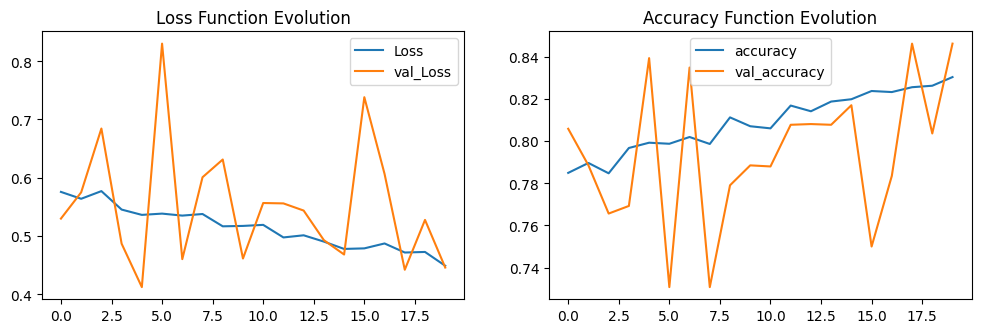

In [27]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(modelZ.history['loss'], label='Loss')
plt.plot(modelZ.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(modelZ.history['accuracy'], label='accuracy')
plt.plot(modelZ.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()


### Saving the Trained Model
After training, the model is saved to a file for future use.


In [29]:
model.save('modelZ.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('saved_model/my_model')

In [26]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
